In [227]:
from scipy.integrate import odeint
from scipy.integrate import quad, solve_ivp
from scipy import integrate
import numpy as np
import ZebraLib as zb
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [228]:
df = pd.read_excel('D:/UNESP/Equipe-Devs/Estruturas/dados.xlsx')
df.head()

,Deformação,Tensão
0,1.000000e-15,1.000000e-15
1,5.150000e-05,9.555556e+03
2,7.040000e-05,3.100000e+04
3,8.970000e-05,5.388889e+04
4,1.085000e-04,7.911111e+04


## Encontrando o polinomial de melhor grau

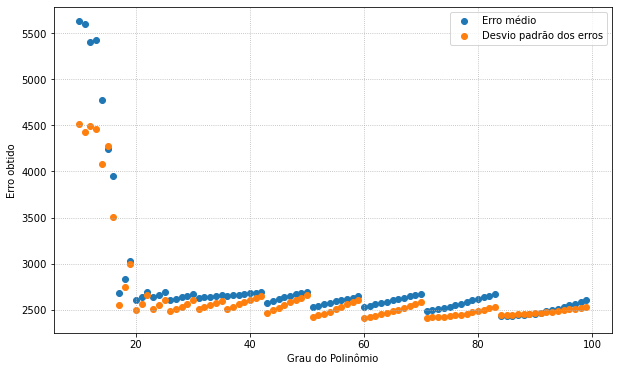

In [229]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set(ylabel='Erro obtido', xlabel='Grau do Polinômio')
std, mean, x = [], [], []

for i in range(10, 100):
    pol = zb.fit(df['Deformação'], df['Tensão'], i)  
    #Pegando a média e os desvios padrão de cada aproximação
    mean.append(abs(df['Tensão'] - pol(df['Deformação'])).mean()) 
    std.append(abs(df['Tensão'] - pol(df['Deformação'])).std()) 
    x.append(i)

ax.scatter(x, mean, label='Erro médio')
ax.scatter(x, std, label='Desvio padrão dos erros')
ax.grid(ls='dotted')
ax.legend()

In [230]:
# Decidimos que  grau 20 oferece um bom resultado
pol = zb.fit(df['Deformação'], df['Tensão'], 20)   
#p = np.poly1d(list(pol), variable='x')
#print(p)

## Plotando os resultados e comparando

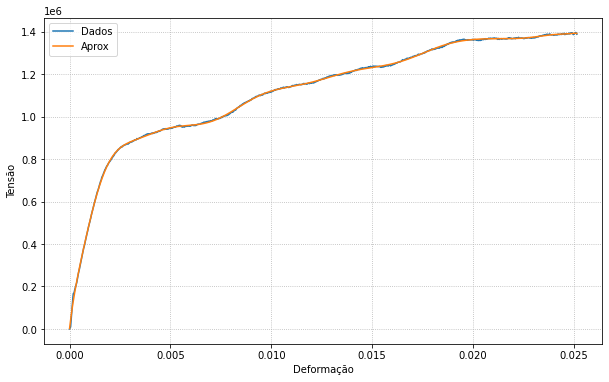

In [231]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set(ylabel='Tensão', xlabel='Deformação')
ax.plot(df['Deformação'], df['Tensão'], label='Dados')
ax.plot(df['Deformação'], pol(df['Deformação']), label='Aprox')
ax.grid(ls='dotted')
ax.legend()

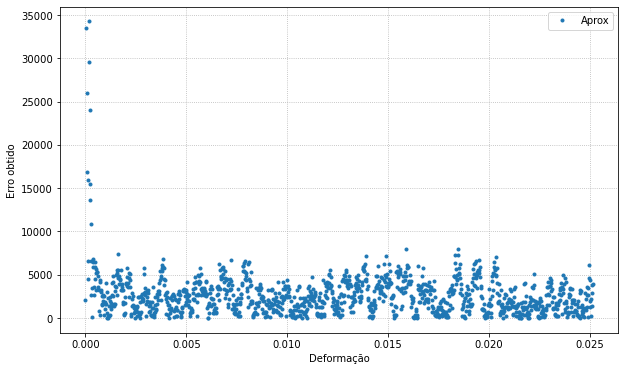

In [232]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set(ylabel='Erro obtido', xlabel='Deformação')
ax.plot(df['Deformação'], abs(df['Tensão'] - pol(df['Deformação'])), 
            'o', markersize=3,label='Aprox')
ax.grid(ls='dotted')
ax.legend()